#### Plotting MPAS with Uxarray Matplotlib
create visualizations using Matplotlib by converting UXarray objects into compatible Matplotlib collections

From Michael Duda:
https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/
latlon_cells.ncl

- Global plot:
    - Global wind speed from Uxarray with Matplotlib
    - Michael's plot from NCL
- Regional plot:
    - Regional plot from Uxarray with Matplotlib
    - Michael's plot from NCL

Ming Ge Feb 2025

In [1]:
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
dir_data = "/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/"

flnm_grid = dir_data + "SouthAmerica.init.nc"
flnm_data = dir_data + "diag.2014-09-11_00.00.00.nc"

uxds_mpas = ux.open_dataset(flnm_grid, flnm_data)

# for wind_speed_level1_max
uxda = uxds_mpas.wind_speed_level1_max.isel(Time=0)

#### Visualize Data with PolyCollection
The Grid.to_polycollection() method can be used to convert a UxDataArray containing a face-centered data variable into a matplotlib.collections.PolyCollection instance. It represents a collection of polygons that represent the faces of an unstructured grid, shaded using the values of the face-centered data variable.

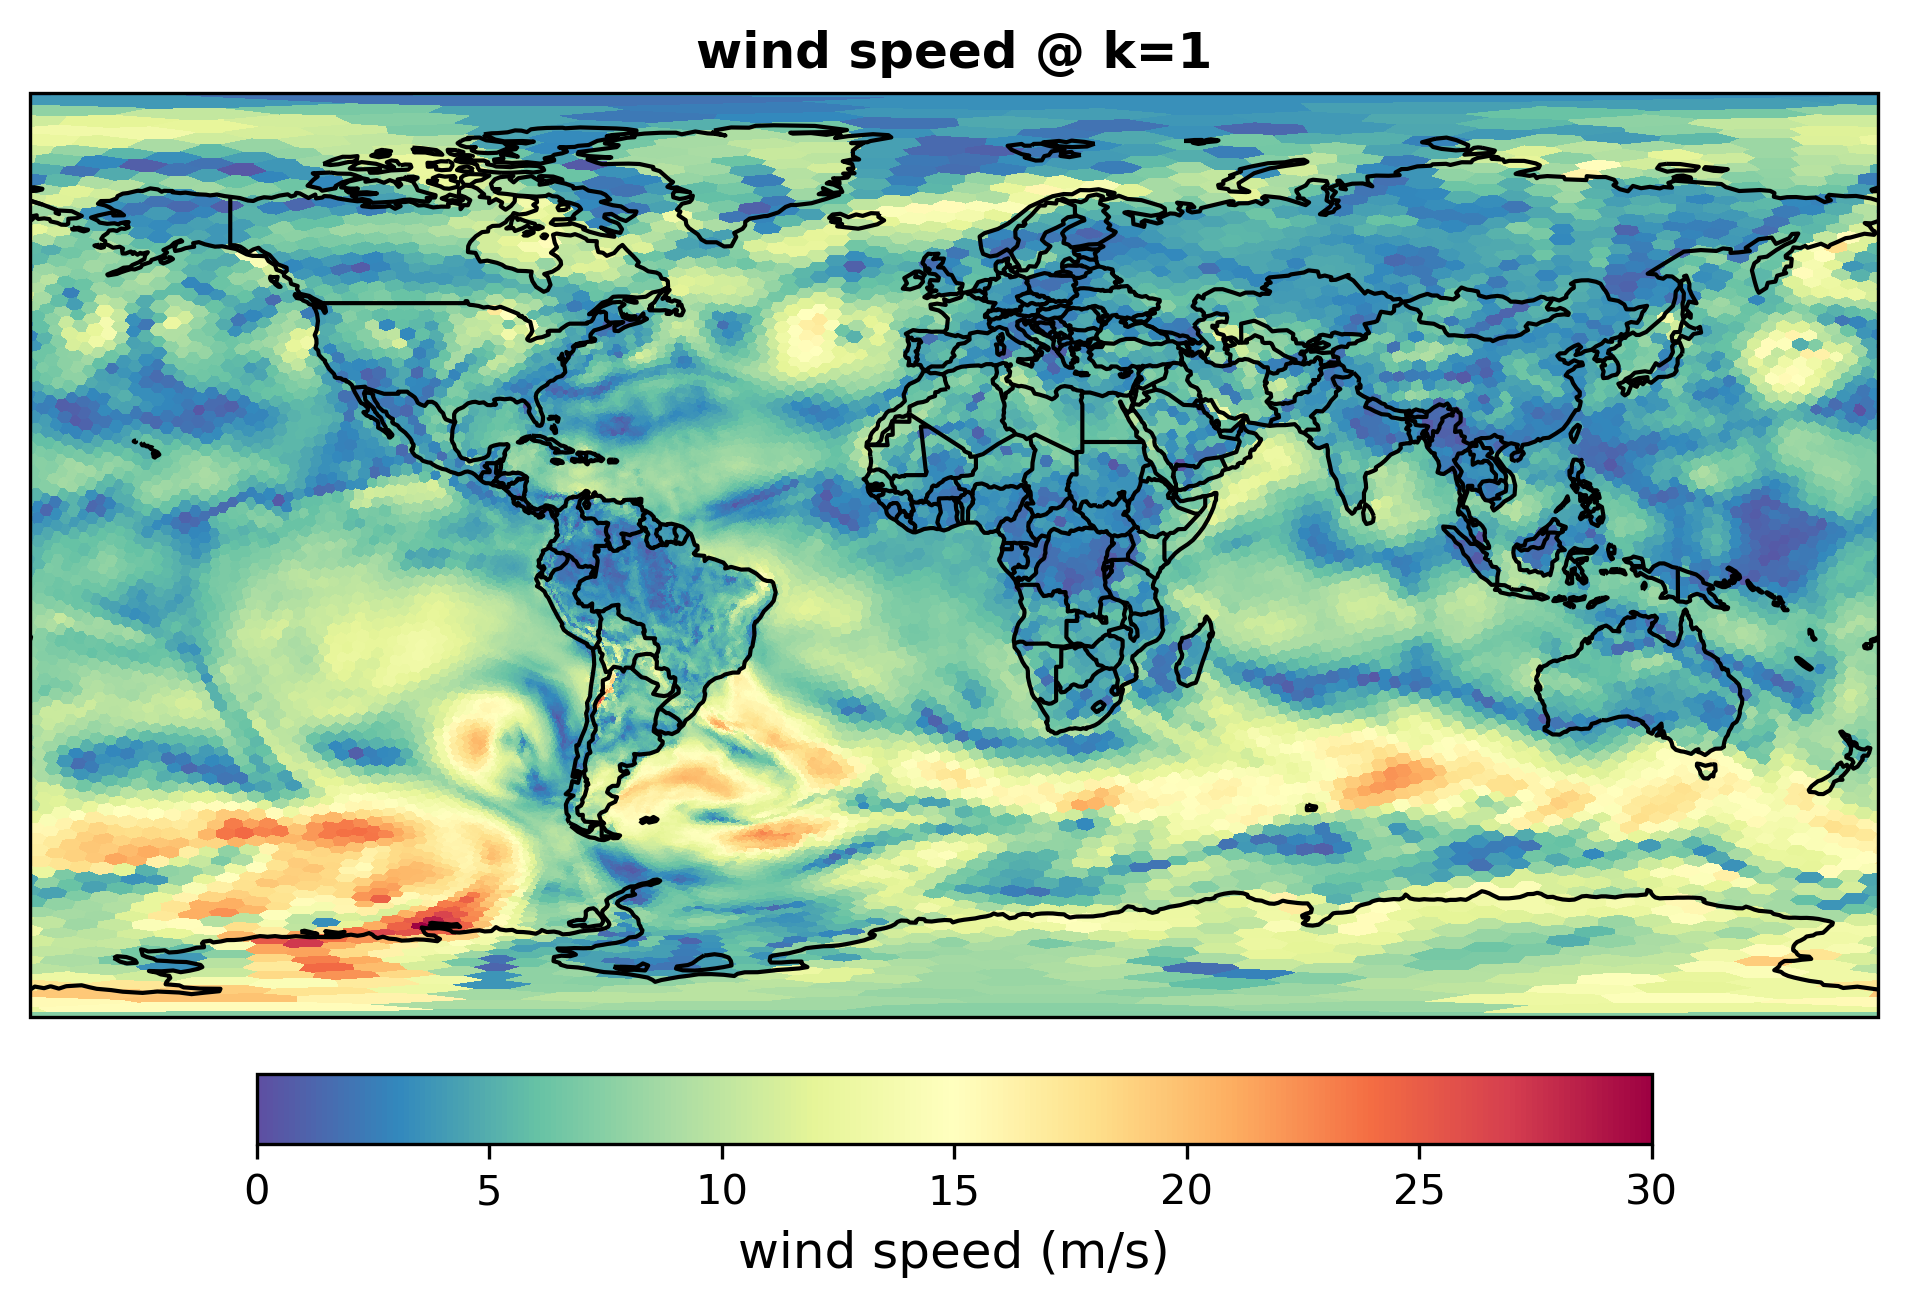

In [3]:
# Handling Periodic Elements
# UXarray provides three ways of handling these elements:
# methods = ["ignore", "exclude", "split"]
# split is slow

pc = uxda.to_polycollection(periodic_elements="split")

# disables grid lines
pc.set_antialiased(False)

pc.set_cmap("Spectral_r")

# The range of field values
pc.set_clim(0, 30)

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi = 300,
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.add_collection(pc)
ax.set_global()
cbar = plt.colorbar(pc, orientation='horizontal', pad=0.05, shrink=0.6)
 
# Set the colorbar title
cbar.set_label("wind speed (m/s)",  fontsize=12)
plt.title("wind speed @ k=1", fontweight="bold",);
plt.savefig('cell_plot.pdf')   

#### Michael's NCL plot from tutorial website

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/images/latlon_cells_global.png")

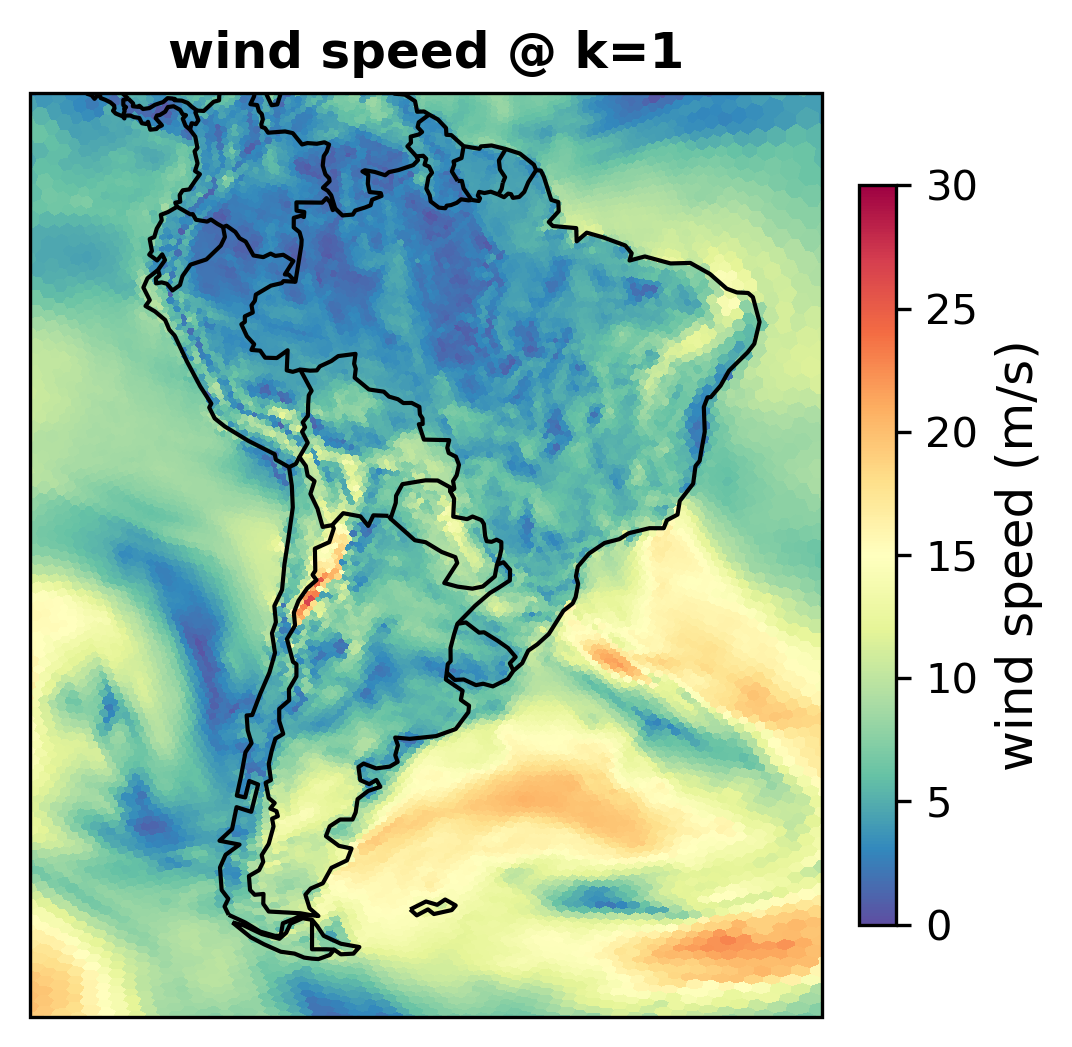

In [6]:
pc = uxda.to_polycollection(periodic_elements="split")
# disables grid lines
pc.set_antialiased(False)

pc.set_cmap("Spectral_r")
pc.set_clim(0,30)

fig, ax = plt.subplots(1, 1, figsize=(8, 4),  dpi=300,
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_xlim((-90, -30))
ax.set_ylim((-60, 10))
ax.add_collection(pc)
#cbar = plt.colorbar(pc, orientation='horizontal', pad=0.05, shrink=0.6)
cbar = plt.colorbar(pc, orientation='vertical', pad=0.02, shrink=0.8) 
 
# Set the colorbar title
cbar.set_label("wind speed (m/s)",  fontsize=12)
plt.title("wind speed @ k=1", fontweight="bold");


#### Michael's NCL plot

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/images/latlon_cells_window.png")